# Optical Communications Project -- Team 8

In [81]:
# fibre specification
n1 = 1.46
n2 = 1.45
lambda_ = 820e-9
a = 5.1e-6
c = 3e8

In [82]:
#import relevant packages
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special as ss
from scipy.optimize import fsolve

## 1. Calculate the V-parameter for the fibre.

In [83]:
V = 2*np.pi*a/lambda_*np.sqrt(n1*n1-n2*n2)
print(V)

6.666266729164944


## 2. Decide whether you are going to consider the {TE, TM, EH, HE} or LP modes for all of the subsequent tasks.


## 3. Identify all the modes that the fibre supports and the propagation constant and effective index for each mode. Summarise the results as a table.

C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:20: RuntimeWarning: invalid value encountered in double_scalars
  u=-ss.kn(m+1, qa)+m*ss.kn(m, qa)/qa
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:21: RuntimeWarning: invalid value encountered in double_scalars
  l= qa*ss.kn(m, qa)
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  t1=(1/(pa)**2+1/(qa)**2)
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  t2=(1/(pa)**2+n2**2/(n1*qa)**2)
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:46: RuntimeWarning: invalid value encountered in double_scalars
  return m**2*t1*t2
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:15: RuntimeWarning: invalid value encountered in double_scalars
  u=-ss.jv(m+1, pa)+m*ss.jv(m, pa)/pa


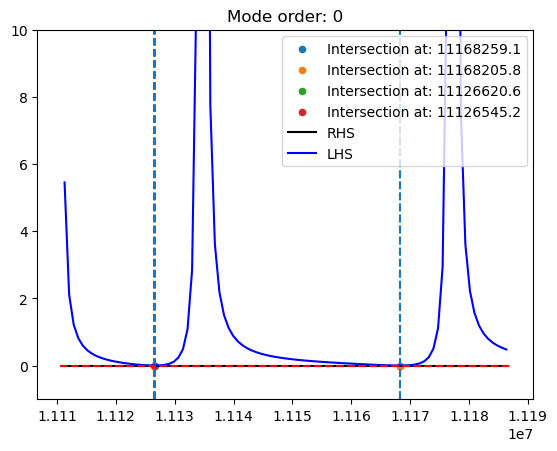

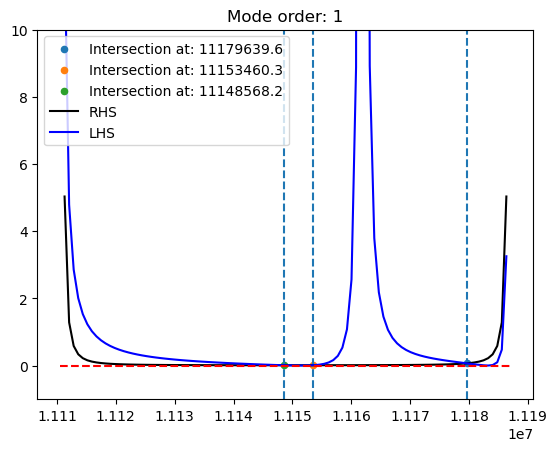

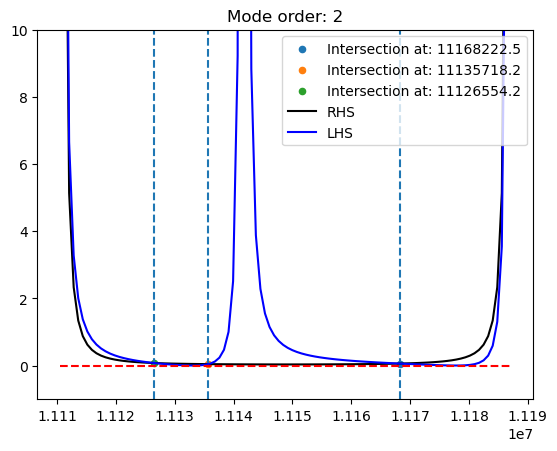

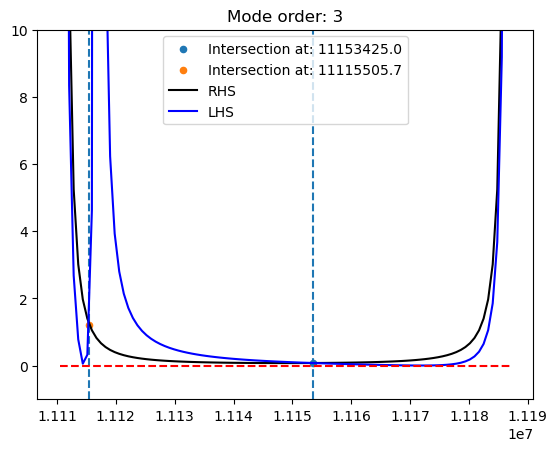

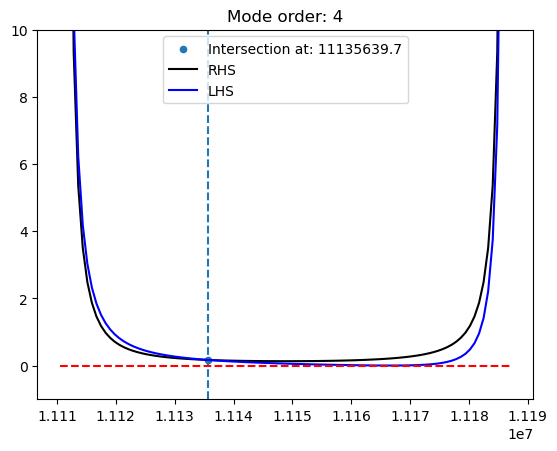

[['TE01', 0, 11168259.1, 1.4575365860267546, 3.3129360121055274], ['TM01', 0, 11168205.8, 1.457529630000812, 3.317606184992294], ['TM02', 0, 11126620.6, 1.4521024680864505, 5.9263215683836235], ['TE02', 0, 11126545.2, 1.452092627854629, 5.930002463491131], ['HE11', 1, 11179639.6, 1.4590218215472377, 2.088160656571897], ['EH11', 1, 11153460.3, 1.4556052382458555, 4.423522301785097], ['HE12', 1, 11148568.2, 1.4549667846902334, 4.733427741729404], ['HE21', 2, 11168222.5, 1.4575318094686027, 3.3161436324966624], ['EH21', 2, 11135718.2, 1.4532897690548743, 5.463824832771996], ['HE22', 2, 11126554.2, 1.452093802418109, 5.929563220758515], ['HE31', 3, 11153425.0, 1.4556006313468728, 4.425836721801819], ['EH31', 3, 11115505.7, 1.4506518952393332, 6.446041713477675], ['HE41', 4, 11135639.7, 1.4532795242511873, 5.467984558107816]]
| Mode name | Mode | beta |neffective |
| TE01 |  0   | 11168259.1 | 1.4575365860267546 |
----------------------------------------------
| TM01 |  0   | 11168205.8 | 1

In [84]:
global n1
global n2
global lambda_ 
global a 
global RNA
global RNB
global k0
#Defining useful vars 
RNA = 1.1428
RNB = 0.996
k0=2*np.pi/lambda_


def j(pa, m):
    u=-ss.jv(m+1, pa)+m*ss.jv(m, pa)/pa
    l=pa*ss.jv(m, pa)
    return u/l

def k(qa, m):
    u=-ss.kn(m+1, qa)+m*ss.kn(m, qa)/qa 
    l= qa*ss.kn(m, qa)
    return u/l

def b(pa):
    p=pa/a
    b=np.sqrt((n1*k0)**2-p**2)
    return b
    
def pa(b):
    p=np.sqrt((n1*k0)**2-b**2)
    return p*a

def lhs(b, m):
    pa=np.sqrt((n1*k0)**2-b**2)*a
    qa=np.sqrt(b**2-(n2*k0)**2)*a
    t1=(j(pa, m)+k(qa, m))
    t2=(j(pa, m)+n2**2*k(qa, m)/n1**2)

    return t1*t2

def rhs(b, m):
    pa=np.sqrt((n1*k0)**2-b**2)*a
    qa=np.sqrt(b**2-(n2*k0)**2)*a
    t1=(1/(pa)**2+1/(qa)**2)
    t2=(1/(pa)**2+n2**2/(n1*qa)**2)
    return m**2*t1*t2 

def f(b):
   return lhs(b, m1)-rhs(b, m1)
global m1
LHS=[]
RHS=[]
btest=np.linspace(n2*k0,n1*k0, 100)
mi=[0, 1, 2, 3, 4] #Modes being investigated
m0=[['TE01', 'TM01', 'TM02', 'TE02'], ['HE11', 'EH11', 'HE12'], ['HE21', 'EH21', 'HE22'], ['HE31', 'EH31'], ['HE41']]
#Guesses based on plotted graphs from 
guesses=[[1.112, 1.113, 1.116, 1.1172], [1.114, 1.1152, 1.117, 1.1181], [1.112, 1.1132, 1.116, 1.118, 1.114, 1.1135], [1.1115, 1.115], [1.113], [min(btest)]]
solfull=[] #Full solutions
for m in mi:
    LHS=[]
    RHS=[]
    paVals=[]
    m1=m
    solutions=[]
    for b in btest:
          LHS.append(lhs(b, m))
          RHS.append(rhs(b, m))
    solutions=[]
    for br in guesses[m]:
       sol=sp.optimize.root(f, br*1e7) # Find roots of LHS-RHS function, using initial guesses based on visual queues from graph   
       solutions.append(round(sol.x[0], 1)) #Append root solution
    s1=np.array(solutions)
    s1=np.flip(np.unique(s1))
    i=0
    for s in s1:
           plt.scatter(s,lhs(s, m), label="Intersection at: "+str(round(s, 1)), s=20 ) #Plot intersection point
           plt.vlines(s,-1,10, linestyle='--' ) #plot vertical line at intersection
           paVals.append(pa(s))
           solfull.append([m0[m][i],m, s,s/k0, pa(s)])
           i+=1
    plt.plot(btest, RHS, 'k', label="RHS")
    plt.plot(btest, LHS, 'b', label="LHS")
    plt.hlines(0, btest[0],btest[-1], linestyle='--', colors='r' )
    plt.ylim(-1, 10)
    plt.legend()
    plt.title("Mode order: "+str(m))
    plt.show()
    '''plt.plot(btest, f(btest))
    plt.hlines(0, btest[0],btest[-1], linestyle='--', colors='r' )
    plt.ylim(-1, 10)
    plt.legend()
    plt.title("Mode order: "+str(m))
    plt.show()'''


print(solfull )
print('| {:1} | {:^4} | {:>4} |{:<3} |'.format(*["Mode name","Mode", "beta", "neffective"]))


for row in solfull:
    print('| {:1} | {:^4} | {:>4} | {:<3} |'.format(*row))
    print('----------------------------------------------')
 

 

## 4. Excluding the fundamental mode {HE11/LP01}, pick one of the modes from your table for the tasks below.


[3.31294017] [5.92632125]


C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\3166686747.py:7: RuntimeWarning: invalid value encountered in sqrt
  qa=np.sqrt(V**2-pa**2)
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\3166686747.py:4: RuntimeWarning: invalid value encountered in true_divide
  return a/pa


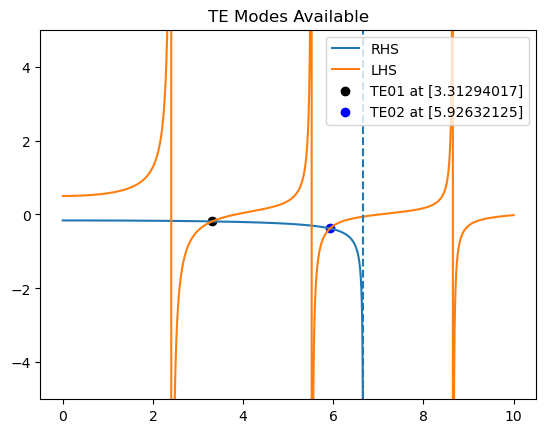

In [85]:
#Choosing TE Modes: 
def LHSTETM(pa):
    a= ss.jv(1, pa)/ss.jv(0,pa)
    return a/pa
    
def RHSTE(pa):
    qa=np.sqrt(V**2-pa**2)
    a= -ss.kn(1, qa)/ss.kn(0,qa)
    return a/qa

def f(pa):

   return LHSTETM(pa)-RHSTE(pa)

def pros(LHS, RHS,f,  g1=1, g2=5):#processign code
   ymax=5
   ymin=-5
   x=np.linspace(0, 10, 5000)
#plt.vlines(x[RHS(x).argmax], -5, 5)
   plt.plot(x, RHS(x), label="RHS")
   plt.plot(x, LHS(x), label="LHS")
   sol=sp.optimize.root(f, g1)#finding roots of difference function
   sol2=sp.optimize.root(f, g2)
   plt.scatter(sol.x, RHS(sol.x), color='k', label="TE01 at "+ str(sol.x))
   plt.scatter(sol2.x, LHS(sol2.x), color='b', label="TE02 at "+ str(sol2.x))
   print(sol.x, sol2.x)#plotting intersections
   plt.legend()
   plt.ylim(-5, 5)
   plt.vlines(V, -5, 5, linestyle='--')


#TE first couple modes

pros(LHSTETM, RHSTE,f, 4.5, 6.2)
plt.title("TE Modes Available")
plt.show()

## 5. Plot maps in the plane perpendicular to the fibre axis of the amplitude of all three E-fields within the fibre. You will need to fix one of the A or B parameters, e.g. to unity, and use the relevant equations to calculate the other values. You can choose to do this for either the {radial, tangential, z} or {x, y, z} E-field components.


A =  1
B =  (-0-0.0038030317043171846j)
C =  -50.234203412815916
D =  0.19104226822005743j


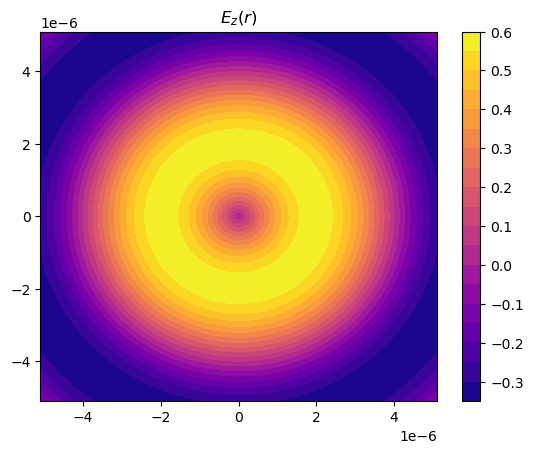

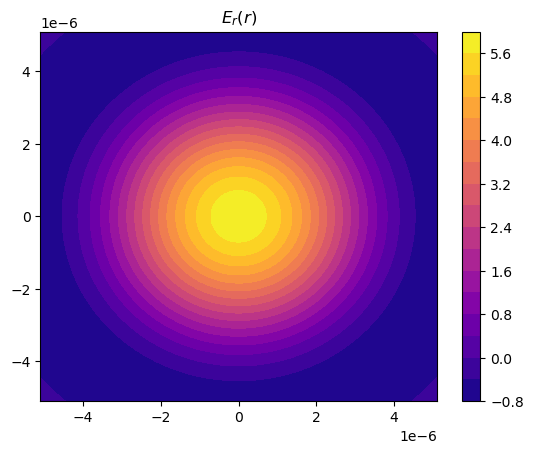

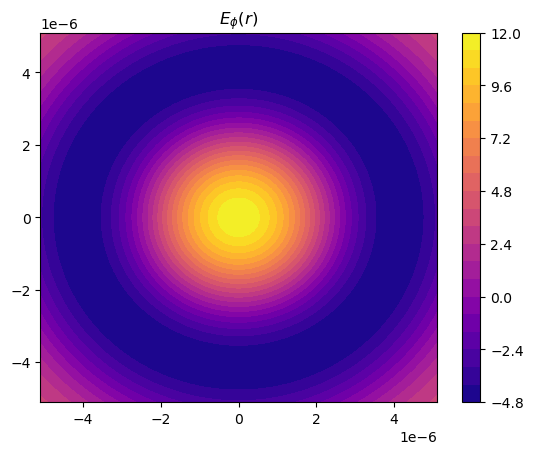

In [86]:
global k0
global w
global mu0
mu0=4*np.pi*1e-7 #vacuum permeability constant in H/m
w=c*k0 #angular frequency of the light

#Choosing the HE12 Mode
global he12_beta 
he12_beta=11148568.2
he12_pa=np.sqrt((n1*k0)**2-he12_beta**2)*a
he12_qa=np.sqrt(he12_beta**2-(n2*k0)**2)*a

#fix A to unity to find amplitudes B,C,D
A=1 

C=A*(ss.jv(1, he12_pa))/(ss.kn(1, he12_qa))

def B(b, m): #finding amplitude B from setting A=1
    pa=np.sqrt((n1*k0)**2-b**2)*a
    qa=np.sqrt(b**2-(n2*k0)**2)*a
    t1=1j*b*m*((1/pa**2)+(1/qa**2))/(w*mu0)
    t2=(j(pa, m)+k(qa, m))
    return t1/t2

B=B(he12_beta,1)

D=B*(ss.jv(1, he12_pa))/(ss.kn(1, he12_qa))

print('A = ', A)
print('B = ', B)
print('C = ', C)
print('D = ', D)

#plotting the three E-field components within the fibre core (1D graphs)

#creating a 2D grid (width of the fibre radius) for a contour plot
x=np.linspace(-a,a,100)
y=np.linspace(-a,a,100)
X,Y=np.meshgrid(x,y)
R=np.sqrt(X**2 + Y**2) #position R on 2D plot

#z-component
def Ez(r):
    m=1
    p=np.sqrt((n1*k0)**2-he12_beta**2)
    return A*(ss.jv(m,p*r))

Ez_vals=[]
for i in R:
    Ez_vals.append(Ez(i))

plt.contourf(X,Y,Ez_vals,20,cmap='plasma')
plt.colorbar()
plt.title('$E_z(r)$')
plt.show()

#r component
def Er(r):
    m=1
    p=np.sqrt((n1*k0)**2-he12_beta**2)
    factor=(-1j*he12_beta/p**2)
    u=-ss.jv(m+1, p*r)+m*ss.jv(m, p*r)/(p*r) #J'
    l=ss.jv(m, p*r) #J
    t1=A*p*u
    t2=(1j*w*mu0*abs(B)*m*l)/(he12_beta*r) # taking the absolute value of B ?????
    return factor*(t1+t2)

Er_vals=[]
for i in R:
    Er_vals.append(Er(i))
    
plt.contourf(X,Y,Er_vals,20,cmap='plasma')
plt.colorbar()
plt.title('$E_r(r)$')
plt.show()

#phi component 
def Ephi(r):
    m=1
    p=np.sqrt((n1*k0)**2-he12_beta**2)
    factor=(-1j*he12_beta/p**2)
    u=-ss.jv(m+1, p*r)+m*ss.jv(m, p*r)/(p*r) #J'
    l=ss.jv(m, p*r) #J
    t1=1j*m*A*l/r
    t2=-w*mu0*p*B*u/he12_beta
    return factor*(t1+t2)

Ephi_vals=[]
for i in R:
    Ephi_vals.append(Ephi(i))
    
plt.contourf(X,Y,Ephi_vals,20,cmap='plasma')
plt.colorbar()
plt.title('$E_\phi(r)$')
plt.show()

## 6. Plot the spatial distribution of the total intensity of the mode in the direction perpendicular to the fibre axis, e.g. sum of the square modulus of the field in the {radial, tangential} or {x, y} directions.

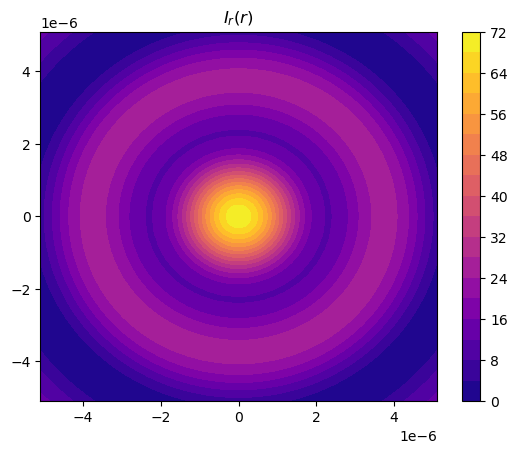

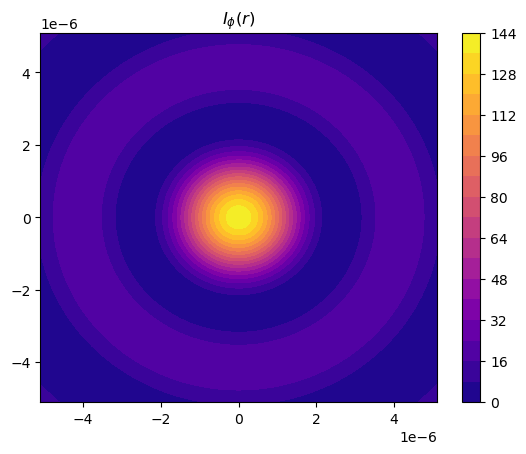

In [87]:
# Intensity in radial direction
Er_intensity = []
Er_vals_Real = []   # the real part of E-field in radial direction
Er_vals_Imag = []   # the imaginary part of E-field in radial direction

for i in range(len(Er_vals)):
    Er_vals_Real.append(Er_vals[i].real)

for i in range(len(Er_vals)):
    Er_vals_Imag.append(Er_vals[i].imag)

for i in range(len(Er_vals)):
    Er_intensity.append(Er_vals_Real[i]**2 + Er_vals_Imag[i]**2)

# Plot
plt.contourf(X,Y,Er_intensity,20,cmap='plasma')
plt.colorbar()
plt.title('$I_r(r)$')
plt.show()

# Intensity in tangential direction
Ephi_intensity = []
Ephi_vals_Real = []   # the real part of E-field in tangential direction
Ephi_vals_Imag = []   # the imaginary part of E-field in tangential direction

for i in range(len(Ephi_vals)):
    Ephi_vals_Real.append(Ephi_vals[i].real)

for i in range(len(Ephi_vals)):
    Ephi_vals_Imag.append(Ephi_vals[i].imag)

for i in range(len(Ephi_vals)):
    Ephi_intensity.append(Ephi_vals_Real[i]**2 + Ephi_vals_Imag[i]**2)

# Plot
plt.contourf(X,Y,Ephi_intensity,20,cmap='plasma')
plt.colorbar()
plt.title('$I_\phi(r)$')
plt.show()

## 7. Calculate numerically the waveguide dispersion $ 𝐷_w = − \frac{\lambda}{c} [\frac{\partial^2n_{eff}}{\partial\lambda^2}]_w = − \frac{\lambda}{c} [\frac{\partial^2n_{m}}{\partial\lambda^2}]_w $ for the mode selected, see notes for lecture 6. For example, calculate this from the effective index calculated for three (or more) wavelengths close to the wavelength of light to be transmitted.

In [88]:
# k0=2*np.pi/lambda_
lambda_test = np.array([800e-9,820e-9,840e-9]) #values near the light wavelength

#get beta for the three different cases
n_eff_test = []
for iter in range(3):
      k0 = 2*np.pi/lambda_test[iter]   
      solfull=[] #Full solutions
      for m in mi:
            LHS=[]
            RHS=[]
            paVals=[]
            m1=m
            solutions=[]
      for b in btest:
            LHS.append(lhs(b, m))
            RHS.append(rhs(b, m))
      solutions=[]
      for br in guesses[m]:
            sol=sp.optimize.root(f, br*1e7) # Find roots of LHS-RHS function, using initial guesses based on visual queues from graph   
            solutions.append(round(sol.x[0], 1)) #Append root solution
      s1=np.array(solutions)
      s1=np.flip(np.unique(s1))
      i=0
      for s in s1:
            paVals.append(pa(s))
            solfull.append([m0[m][i],m, s,s/k0, pa(s)])
            i+=1

      beta = solfull[0][2]
      n_eff_test.append(beta/k0)

#use finite difference method to evaluate the gradients
grad_1 = (n_eff_test[1]-n_eff_test[0])/(lambda_test[1]-lambda_test[0])
grad_2 = (n_eff_test[2]-n_eff_test[1])/(lambda_test[2]-lambda_test[1])
second_grad = (grad_2-grad_1)/(lambda_test[1]-lambda_test[0])
Dw = -lambda_/c*second_grad
print(Dw)

1.5273690223693832e-15


C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:35: RuntimeWarning: invalid value encountered in sqrt
  qa=np.sqrt(b**2-(n2*k0)**2)*a
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:43: RuntimeWarning: invalid value encountered in sqrt
  qa=np.sqrt(b**2-(n2*k0)**2)*a
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\3166686747.py:7: RuntimeWarning: invalid value encountered in sqrt
  qa=np.sqrt(V**2-pa**2)
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:20: RuntimeWarning: invalid value encountered in double_scalars
  u=-ss.kn(m+1, qa)+m*ss.kn(m, qa)/qa
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:21: RuntimeWarning: invalid value encountered in double_scalars
  l= qa*ss.kn(m, qa)
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  t1=(1/(pa)**2+1/(qa)**2)
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\293114269.py:45: RuntimeWarning: divide by zero encounte

## 8. Using your result to part 6, calculate the fraction of energy in the core and cladding by summing over the relevant regions. Use equation $𝑛^2_{eff} \approx 𝑛^2_1\Gamma(𝑉) + 𝑛^2_2(1 − \Gamma(𝑉)) $ to calculate an approximate value for the effective index. Compare this value of the effective index to the value you calculated directly and comment on your result.

In [89]:
import scipy.integrate as integrate
import scipy.special as special
import numpy as np

RNA = 1.1428
RNB = 0.996

def Ir(r):
        rii=Ephi(r)
        i=rii.imag
        rr=rii.real
        I=rr**2+i**2
        return I
 

def TrV(V):
    #in core
    core=integrate.quad(Ir, 0, a) #this is just a placeholder - will fix when know form of input
    cladding=integrate.quad(Ir, a,np.inf)
    return core[0]/cladding[0]
    
    
def T(V): #Energy proportion in core 
    return (RNA-RNB/V)**2
        
def n_eff(T, V):
    return np.sqrt(n1**2*T(V)+n2**2*(1-T(V)))

Guestimate=n_eff(T, V)
TrV(V)
actual=n_eff(TrV, V)
actual, Guestimate

C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\2367318085.py:80: RuntimeWarning: invalid value encountered in sqrt
  p=np.sqrt((n1*k0)**2-he12_beta**2)
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\196334634.py:18: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  core=integrate.quad(Ir, 0, a) #this is just a placeholder - will fix when know form of input
C:\Users\Eva\AppData\Local\Temp\ipykernel_14300\196334634.py:19: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  cladding=integrate.quad(Ir, a,np.inf)


(nan, 1.4598687027903152)